In [1]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB

<br>
<br>

# 데이터 로드

In [2]:
# 데이터셋 폴더 위치
train_dir = "./train_data"
test_dir = "./test_data"

# 디렉토리 파일 목록을 생성
emails = os.listdir(train_dir)
emails.sort()

len(emails)


289

In [3]:
emails


['3-1msg1.txt',
 '3-1msg2.txt',
 '3-1msg3.txt',
 '3-375msg1.txt',
 '3-378msg1.txt',
 '3-378msg2.txt',
 '3-378msg3.txt',
 '3-378msg4.txt',
 '3-378msg5.txt',
 '3-379msg1.txt',
 '3-379msg2.txt',
 '3-379msg3.txt',
 '3-380msg1.txt',
 '3-380msg2.txt',
 '3-380msg3.txt',
 '3-380msg4.txt',
 '3-380msg5.txt',
 '3-380msg6.txt',
 '3-380msg7.txt',
 '3-383msg0.txt',
 '3-383msg1.txt',
 '3-384msg0.txt',
 '3-384msg1.txt',
 '3-384msg2.txt',
 '3-384msg3.txt',
 '3-385msg1.txt',
 '3-385msg2.txt',
 '3-385msg3.txt',
 '3-387msg0.txt',
 '3-387msg1.txt',
 '3-387msg2.txt',
 '3-388msg1.txt',
 '3-389msg1.txt',
 '3-390msg0.txt',
 '3-390msg1.txt',
 '3-390msg2.txt',
 '3-390msg3.txt',
 '3-390msg4.txt',
 '3-390msg5.txt',
 '3-391msg1.txt',
 '3-392msg0.txt',
 '3-392msg1.txt',
 '3-395msg1.txt',
 '3-395msg2.txt',
 '3-397msg1.txt',
 '3-398msg1.txt',
 '3-401msg1.txt',
 '3-402msg1.txt',
 '3-402msg2.txt',
 '3-402msg3.txt',
 '3-404msg1.txt',
 '3-404msg2.txt',
 '3-404msg3.txt',
 '3-404msg4.txt',
 '3-404msg5.txt',
 '3-404msg6.txt'

In [4]:
# 정상 이메일
f = open(os.path.join(train_dir, "3-378msg4.txt"))

for line in f:
    print(line)
    

Subject: german corpora



i am looking for on-line corpora of modern german . any information would be appreciated . ken beesley beesley . parc @ xerox . com



In [5]:
# 스팸 이메일
f = open(os.path.join(train_dir, "spmsga100.txt"))

for line in f:
    print(line)
    

Subject: do want the best and economical hunting vacation of your life ?



if you want the best hunting and camping vacation of your life , come to felton 's hunting camp in wild and wonderful west virginia . $ 50 . 00 per day pays for your room and three home cooked meals ( packed lunch if you want to stay out in the woods at noon ) with cozy accomodations . reserve your space now . following seasons are now being booked for 1998 : buck season - nov . 23 - dec . 5 doe season - to be announced ( please call ) muzzel loader ( deer ) - dec . 14 - dec . 19 archery ( deer ) - oct . 17 - dec . 31 turkey sesson - oct . 24 - nov . 14 e - mail us at 110734 . 2622 @ compuserve . com



<br>
<br>

# 단어사전 생성

In [6]:
# 단어사전 초기화
dictionary = []

# 파일 목록에 있는 모든 이메일을 읽음
for email in emails:
    f = open(os.path.join(train_dir, email))

    for i, line in enumerate(f):
        # 본문의 내용인 3번째 행만 추출
        if i == 2:
            words = line.split()
            dictionary += words

# 중복 단어 삭제
dictionary = list(set(dictionary))

# 알파벳이 아니거나 한 글자인 단어 삭제
for index, word in enumerate(dictionary):
    if (word.isalpha() == False) or (len(word) == 1):
        del dictionary[index]
        
len(dictionary)


11947

In [7]:
dictionary[:30]


['distinctive',
 'bit',
 'instance',
 'elphick',
 'yabuti',
 'majoring',
 'placements',
 'ben',
 'facto',
 'embarrassing',
 'native',
 'intermediate',
 'daytime',
 'philadelphia',
 'tail',
 'caplin',
 'mmorse',
 'morfologico',
 'buenos',
 'heim',
 'chem',
 'examination',
 'protectors',
 'seventh',
 'sponsor',
 'matses',
 'submitting',
 'mathematical',
 'ethical',
 'either']

<br>
<br>

# 전처리 

In [8]:
# 특성 데이터 생성 
def build_features(dir, dictionary):

    # 디렉토리 파일 목록을 생성
    emails = os.listdir(dir)
    emails.sort()
    
    # 특성 매트릭스 초기화
    # 이메일 개수 x 단어의 개수
    features_matrix = np.zeros((len(emails), len(dictionary)))

    # 모든 파일 반복
    for email_index, email in enumerate(emails):
        # 파일을 로드
        f = open(os.path.join(dir, email))
        
        # 모든 라인 반복
        for line_index, line in enumerate(f):
            # 본문의 내용만 추출
            if line_index == 2:
                # 단어로 분리
                words = line.split()

                # BoW 설정
                for word_index, word in enumerate(dictionary):
                    features_matrix[email_index, word_index] = words.count(word)

    return features_matrix

In [9]:
# 라벨 데이터 생성
def build_labels(dir):
    
    # 디렉토리 파일 목록을 생성
    emails = os.listdir(dir)
    emails.sort()

    # 라벨 매트릭스 초기화
    labels_matrix = np.zeros(len(emails))

    # 모든 파일 반복
    for index, email in enumerate(emails):
        # 파일이름의 앞부분으로 스팸 구분
        if re.search('spms*', email):
            labels_matrix[index] = 1
        else:
            labels_matrix[index] = 0

    return labels_matrix

In [10]:
# 훈련셋 특성 데이터 생성
features_train = build_features(train_dir, dictionary)

In [11]:
len(features_train)


289

In [12]:
len(features_train[0])


11947

In [13]:
features_train[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
# 훈련셋 라벨 데이터 생성
labels_train = build_labels(train_dir)

In [15]:
len(labels_train)


289

In [16]:
labels_train


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
# 테스트셋 특성 데이터 생성
features_test = build_features(test_dir, dictionary)

In [18]:
len(features_test)


44

In [19]:
len(features_test[0])


11947

In [20]:
features_test[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
# 테스트셋 라벨 데이터 생성
labels_test = build_labels(test_dir)

In [22]:
len(labels_test)


44

In [23]:
labels_test


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<br>
<br>

# 워드 클라우드 분석

In [24]:
# 특성을 텍스트로 변환
def convert_text(features, labels, dictionary, spam_info):
    
    text = ""
    
    # 모든 이메일 반복
    for index, feature in enumerate(features):
        # 스팸 라벨 검사
        if labels[index] == spam_info:
            # 모든 특성 단어 반복
            for index_feature, count in enumerate(feature):
                # 단어의 개수만큼 텍스트에 추가
                for i in range(int(count)):
                    text += dictionary[index_feature] + " "
                
    return text

In [25]:
# 정상 이메일을 텍스트로 변환
text = convert_text(features_train, labels_train, dictionary, 0)

print(text[:1000])


mmorse either ( relevant name name name have asks form ca michael as queries in in sense sense might give thus irrelevant now is is is is is is is re much a a if if dec no no indistinguishable level wlodek natural about this this entity false for what what what sun np np of of of of of of ' ' ' ' ' ' supplies logical were and and and would attribute attribute date chaim anything construction construction at list well well has from from be be be yorku subject interesting language semantics an tautology it it it est john john john we we second shmendrik late very value value value @ said followed related by discussed to to to to to to there fact who that that that consider on support here tautologous tautologous tautologous the the the the the the the the the the the the those been reduplication reduplication zadrozny mcnamara mcnamara mcnamara which say say read as il me source in in now put tersely a a a reminds critique languages department some some carbondale southern np np bitnet o

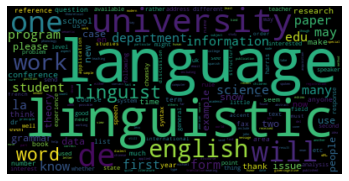

In [26]:
from wordcloud import WordCloud, STOPWORDS

# 워드 클라우드 생성
# collocations=False : 연속된 단어를 고려하지 않음
wc = WordCloud(stopwords=STOPWORDS, collocations=False)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


In [27]:
# 스팸 이메일을 텍스트로 변환
text = convert_text(features_train, labels_train, dictionary, 1)

print(text[:1000])


( ( checks name good have his every every course profitable application as make area area area him in in in in in becoming stores address customers removed commission commission use effort boxes compensaation com can receive our our hundreds is is is details pay save how much months your your a a a a a a a with hotmail earn tells counter this could little introduce spot for for for for for for find what of of of of you you you you you app and and and and and type effective store store display display company years list mail need need need new card from from from manager be be be be owner hours subject place place place box box box mailing it small small sent each drawing will will will yourself representative we we also or or or credit very @ plan by script to to to to to to them them all there that that that that that nothing on applications send send here remove done more more more the the the the the the the the the code their their so call dollars business do which say came either 

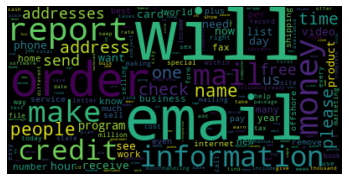

In [28]:
# 워드 클라우드 생성
wc = WordCloud(stopwords=STOPWORDS, collocations=False)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()


<br>
<br>

# 모델 생성 및 훈련

In [29]:
classifier = MultinomialNB()
classifier.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

<br>
<br>

# 테스트셋 확인

In [30]:
accuracy = classifier.score(features_test, labels_test)

print(accuracy)


0.9772727272727273


In [31]:
# 텍스트의 특성 데이터를 구함
def get_features(text):

    # 특성 매트릭스 초기화
    features_matrix = np.zeros((1, len(dictionary)))

    # 단어로 구분
    words = text.split()

    # BoW 설정
    for word_index, word in enumerate(dictionary):
        features_matrix[0, word_index] = words.count(word)

    return features_matrix

In [32]:
# 정상
test = get_features("send me email about korean movie")
classifier.predict(test)


array([0.])

In [33]:
# 스팸
test = get_features("make money with this product. don't miss this opportunity!")
classifier.predict(test)


array([1.])